In [1]:
#check_results.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of particles having 1e-6 < e < 1e-2 particles for 2e4 orbits
#and show that the fractional variations in a,e,wt are tiny

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore saved data & compare
from helper_fns import *
execfile('inputs.py')
a, e, wt, M, times = restore_output(output_folder)
r, t, vr, vt = elem2coords(J2, Rp, a, e, wt, M, sort_particle_longitudes=False)

In [17]:
#select particle 2
idx = 10
rp = r[:, idx].flatten()
tp = t[:, idx].flatten()
wtp = wt[:, idx].flatten()
wtp_unwrapped = unwrap_angle(wtp)
Mp = M[:, idx].flatten()
Mp_unwrapped = unwrap_angle(Mp)
print len(times), len(rp), len(tp)
a0 = a[0, idx][0]
e0 = e[0, idx][0]
q0 = a0*(1.0 - e0)
Q0 = a0*(1.0 + e0)
print a0, e0, q0, Q0

10001 10001 10001
1.5 0.00795635513685 1.48806546729 1.51193453271


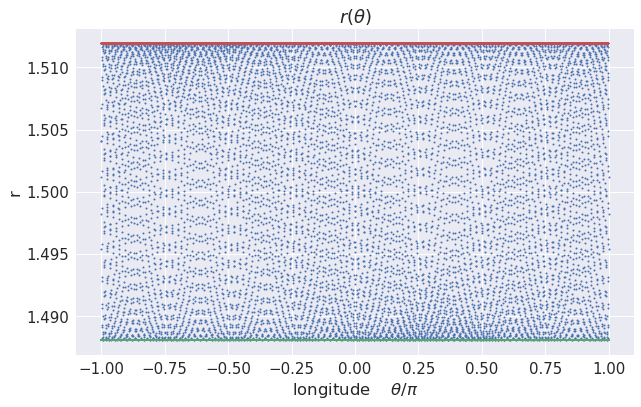

In [18]:
#plot r(theta)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(tp/np.pi, rp, marker='o', markersize=2, linestyle='none')
ax.plot(tp/np.pi, rp*0 + q0, linestyle='-')
ax.plot(tp/np.pi, rp*0 + Q0, linestyle='-')
ax.set_title('$r(\\theta)$')
ax.set_xlabel('longitude    $\\theta/\pi$')
ax.set_ylabel('r')

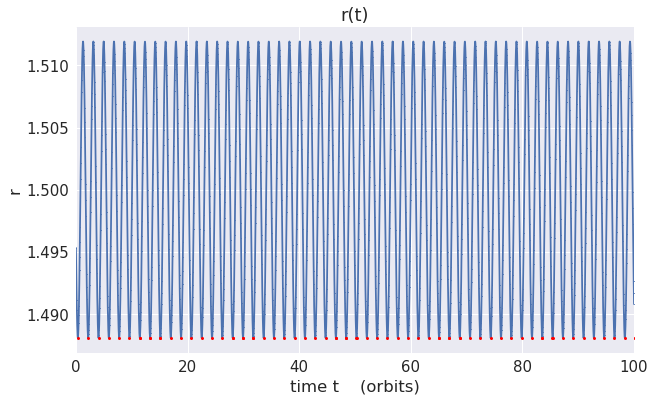

In [21]:
#plot r(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), rp, marker='o', markersize=1, linestyle='-')
ax.set_title('r(t)')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('r')
ax.set_xlim(0, 100)
tm_peri = (rp < 1.00002*q0)
ax.plot(times[tm_peri]/(2.0*np.pi), rp[tm_peri], marker='o', markersize=3, linestyle='none', color='red')

(0, 100)

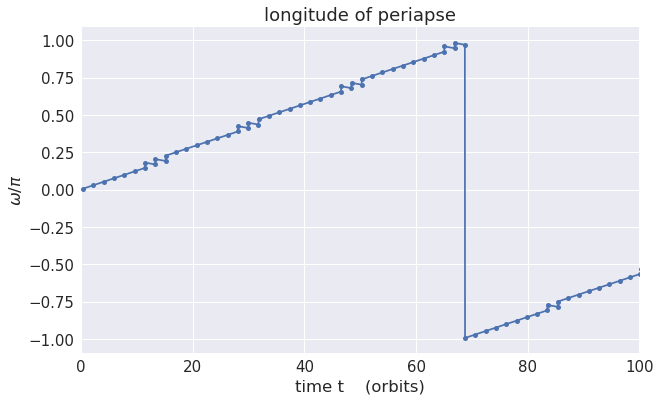

In [22]:
#get longitude of peri from r(time) plot
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times[tm_peri]/(2.0*np.pi), tp[tm_peri]/np.pi, marker='o', markersize=5, linestyle='-')
ax.set_title('longitude of periapse')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$\omega/\pi$')
ax.set_xlim(0, 100)

(0, 100)

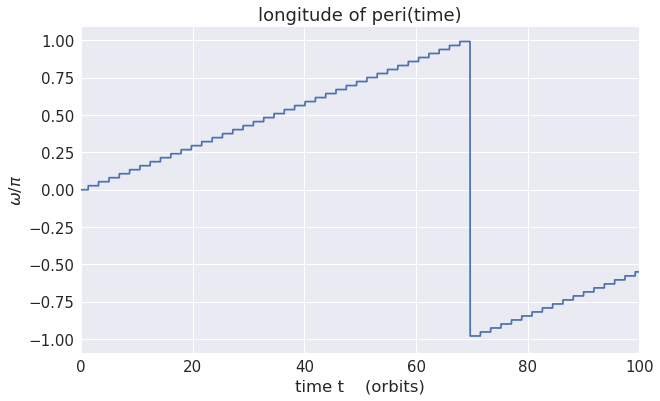

In [23]:
#plot wtp(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), wtp/np.pi, linestyle='-')
ax.set_title('longitude of peri(time)')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$\omega/\pi$')
ax.set_xlim(0, 100)

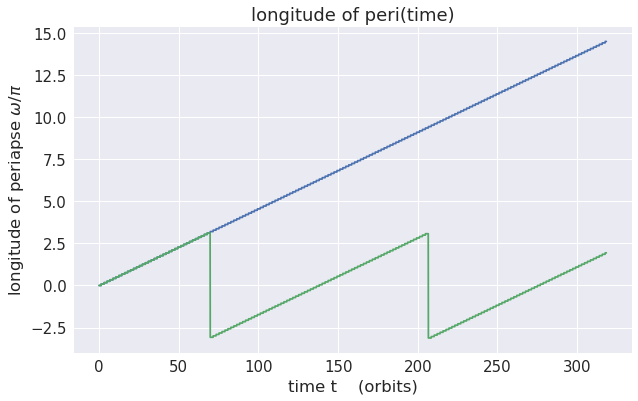

In [24]:
#plot wtp_unwrapped(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), wtp_unwrapped, linestyle='-')
ax.plot(times/(2.0*np.pi), wtp, linestyle='-')
ax.set_title('longitude of peri(time)')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('longitude of periapse $\omega/\pi$')
#ax.set_xlim(0, 100)

In [25]:
#calculate observed and expected precession rates
a0 = a[0].flatten()
dwdt_obs = np.zeros_like(a0)
for pidx in range(len(dwdt_obs)):
    wt_unwrapped = unwrap_angle(wt[:, pidx].flatten())
    dwdt_obs[pidx] = (wt_unwrapped[-1] - wt_unwrapped[0])/(times[-1] - times[0])
dwdt_exp = Omega(J2, Rp, a0) - Kappa(J2, Rp, a0)

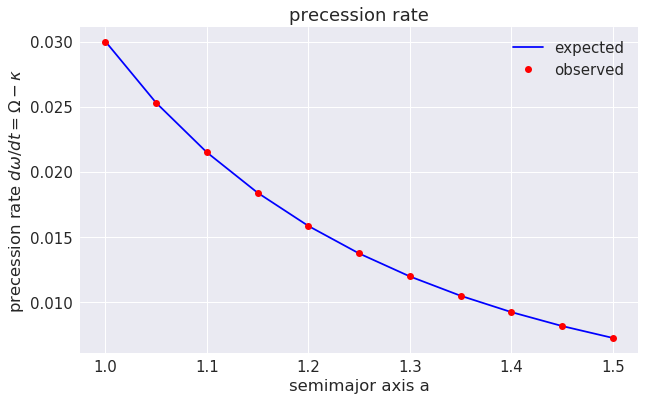

In [26]:
#compare precession rates
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(a0, dwdt_exp, linestyle='-', label='expected', color='blue')
ax.plot(a0, dwdt_obs, marker='o', markersize=7, linestyle='none', label='observed', color='red')
ax.set_title('precession rate')
ax.set_xlabel('semimajor axis a')
ax.set_ylabel('precession rate $d\omega/dt = \Omega - \kappa$')
ax.legend()

(-3, 60)

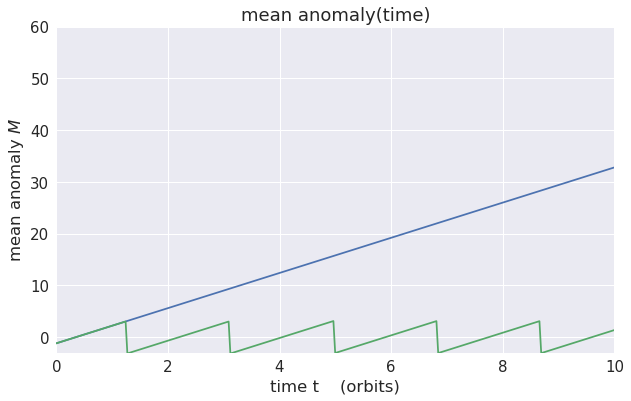

In [27]:
#plot Mp_unwrapped(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), Mp_unwrapped, linestyle='-')
ax.plot(times/(2.0*np.pi), Mp, linestyle='-')
ax.set_title('mean anomaly(time)')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('mean anomaly $M$')
ax.set_xlim(0, 10)
ax.set_ylim(-3, 60)

In [28]:
#calculate observed and expected epicyclic frequencies dM/dt = Kappa
a0 = a[0].flatten()
dMdt_obs = np.zeros_like(a0)
for pidx in range(len(dMdt_obs)):
    M_unwrapped = unwrap_angle(M[:, pidx].flatten())
    dMdt_obs[pidx] = (M_unwrapped[-1] - M_unwrapped[0])/(times[-1] - times[0])
dMdt_exp = Kappa(J2, Rp, a0)

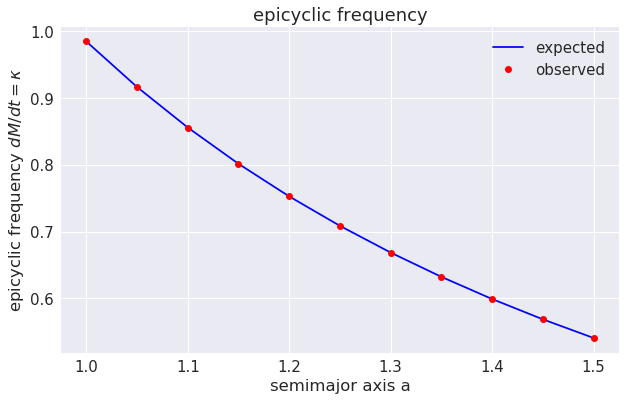

In [29]:
#compare epicyclic frequencies
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(a0, dMdt_exp, linestyle='-', label='expected', color='blue')
ax.plot(a0, dMdt_obs, marker='o', markersize=7, linestyle='none', label='observed', color='red')
ax.set_title('epicyclic frequency')
ax.set_xlabel('semimajor axis a')
ax.set_ylabel('epicyclic frequency $dM/dt=\kappa$')
ax.legend()